In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()

# Requires 1.5
torch.__version__

'1.5.0'

## Test State Creation and Visualization

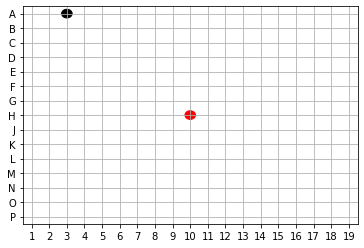

In [2]:
from lib.testing_utilities import create_state, visualize_state

curr_state = create_state('H10', 'A3')
visualize_state(curr_state)

## Test Placements

In [3]:
from lib.moves import create_placement_getter
get_placements = create_placement_getter(torch.device('cpu'))

In [4]:
new_states = get_placements(curr_state)
new_states.requires_grad

False

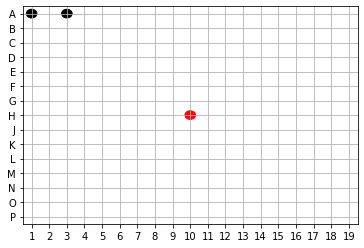

In [5]:
# First placement in upper left
visualize_state(new_states[0])

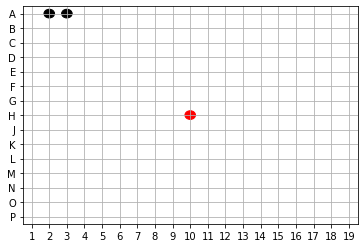

In [6]:
# Second placement moves across rows
visualize_state(new_states[1])

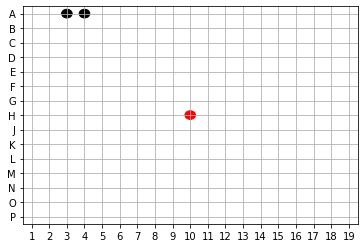

In [7]:
# Next placement skips the illegal spot
visualize_state(new_states[2])

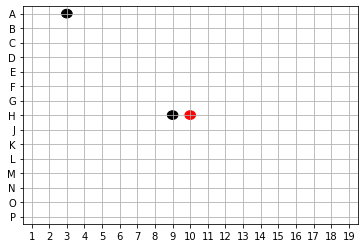

In [8]:
# Placement next to the ball
visualize_state(new_states[140])

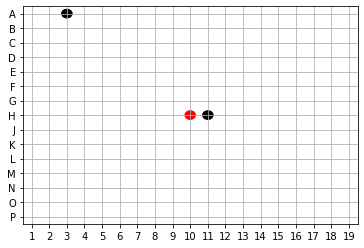

In [9]:
# Ball is skipped
visualize_state(new_states[141])

### Profiling (on CPU)

In [10]:
# Some randomly generated boards (fixed seed) to use
#  They range in number of pieces placed from 0 to 50 in order
from lib.testing_utilities import boards

# Conclusion: extremely fast. Compared to the time to compute the network, essentially 0.
%timeit get_placements(boards[0]);
%timeit get_placements(boards[-1]);

128 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
105 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Test Jumps

### Some Profiling

In [11]:
from lib.utilities import cartesian_product, config, join
from lib.moves import get_dests_from_rest, get_dest_from_motion

%timeit [get_dests_from_rest[currPos] for currPos in cartesian_product(range(config.rows), range(config.cols))]

# Check there are the correct number of values to call
#  The number is given by inclusion-exclusion (suitably modified)
assert len(list(join(get_dests_from_rest.values()))) == (17*13*8 + ((17 + 13) * 2) * 5 + 4 * 3)

%timeit [get_dest_from_motion[val] for val in join(get_dests_from_rest.values())]

44.1 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
256 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Tests 1: Simple State

In [12]:
from lib.moves import get_jumps

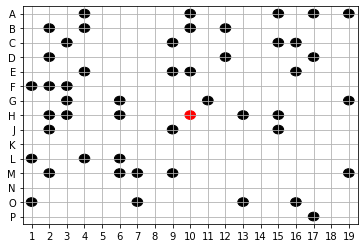

In [13]:
simple_state = boards[-2] # At index -1 it is possible to win!

# Board was generated randomly (with fixec seed).
#  it usually has about 1 or 2 jumps that can be made.
visualize_state(simple_state)

2 possible jumps
95.7 µs ± 8.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


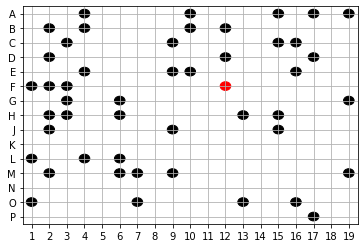

In [14]:
print(f'{len(get_jumps(simple_state))} possible jumps')
%timeit get_jumps(simple_state)
visualize_state(torch.tensor(get_jumps(simple_state)[0][0]))

In [15]:
from lib.testing_utilities import winnable_state, winnable_state_2, test_1, 

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-15-6c31bd71c325>, line 1)

In [ ]:
# Pretty fast on a per-jump basis
print(f'{len(get_jumps(test_1))} possible jumps')
%timeit get_jumps(test_1)
visualize_state(test_1)

In [ ]:
# Turns out this isn't actually winnable
print(len(get_jumps(winnable_state)))
visualize_state(winnable_state)

In [ ]:
print(len(get_jumps(winnable_state_2)))
%timeit get_jumps(winnable_state_2)
visualize_state(winnable_state_2)